In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../..'))

In [2]:
import plankton.plankton as pl
import matplotlib.pyplot as plt
import numpy as np

##### Load coordinate data:

In [3]:
# from urllib import request

# # Define base URL path to the data
# ISS_link = "https://export.uppmax.uu.se/snic2022-23-113/courses/spatial_omics_2022/in_situ_sequencing/S2T1_pcw6.csv"    

# # Create directory for the dataset
# os.makedirs( "./data/in_situ_sequencing" , exist_ok= True )

# # Download necessary tar.gz files
# # for tar_file in ["raw_tiles_with_z.tar.gz","SpaceTX.tar.gz"]:
# #     print ("Downloading " + base_path + tar_file)
# request.urlretrieve(ISS_link , "./data/in_situ_sequencing/coordinates.csv" )



##### Load background image:

In [4]:
# from PIL import Image
# Image.MAX_IMAGE_PIXELS = 933120000

# image_file='background.png'
# image_resolution=umpp #um/px
# image_downsampling=0.1 #downsample image to 10% resolution for faster plotting

# bg = Image.open(os.path.join(data_folder,image_file),) 
# bg = bg.resize((int(bg.width*image_downsampling),int(bg.height*image_downsampling)),Image.ANTIALIAS)
# bg = np.array(bg.getdata()).reshape((bg.height,bg.width,-1)).sum(-1)

# bgmap = pl.PixelMap(bg,upscale=1/image_downsampling/image_resolution)


In [5]:
import pandas as pd
coordinates = pd.read_csv('./data/in_situ_sequencing/coordinates.csv')

In [6]:
coordinates

,Gene,Global_y_pos,Global_x_pos,Q,parentCell
0,FLT1,4909.911982,1190.493724,1190.493724,1190.493724
1,FLT1,4908.912407,1194.492023,1194.492023,1194.492023
2,JAG2,4852.936212,1614.313488,1614.313488,1614.313488
3,RSPO2,4940.898805,1634.304986,1634.304986,1634.304986
4,SPRY1,4982.880951,1759.251850,1759.251850,1759.251850
...,...,...,...,...,...
394687,NOTCH2,11071.291758,3863.357046,3863.357046,3863.357046
394688,PDGFRB,11083.286657,3861.357897,3861.357897,3861.357897
394689,ETS1,11332.180811,3860.358322,3860.358322,3860.358322
394690,FZD1,11426.140853,3861.357897,3861.357897,3861.357897


In [7]:
sdata = pl.SpatialData(x_coordinates=coordinates.Global_x_pos,
                       y_coordinates=coordinates.Global_y_pos,
                       genes=coordinates.Gene
                      )

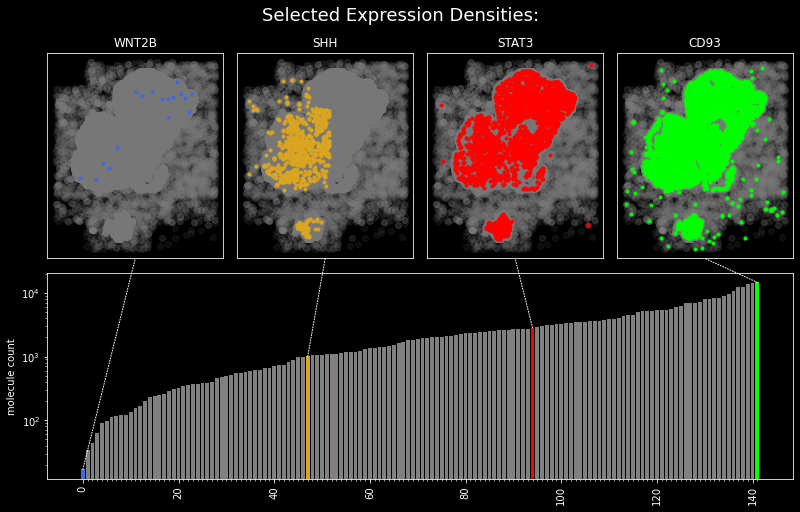

In [8]:
sdata.plot_overview()

(<matplotlib.collections.PathCollection at 0x7f877c47c520>, None, None)

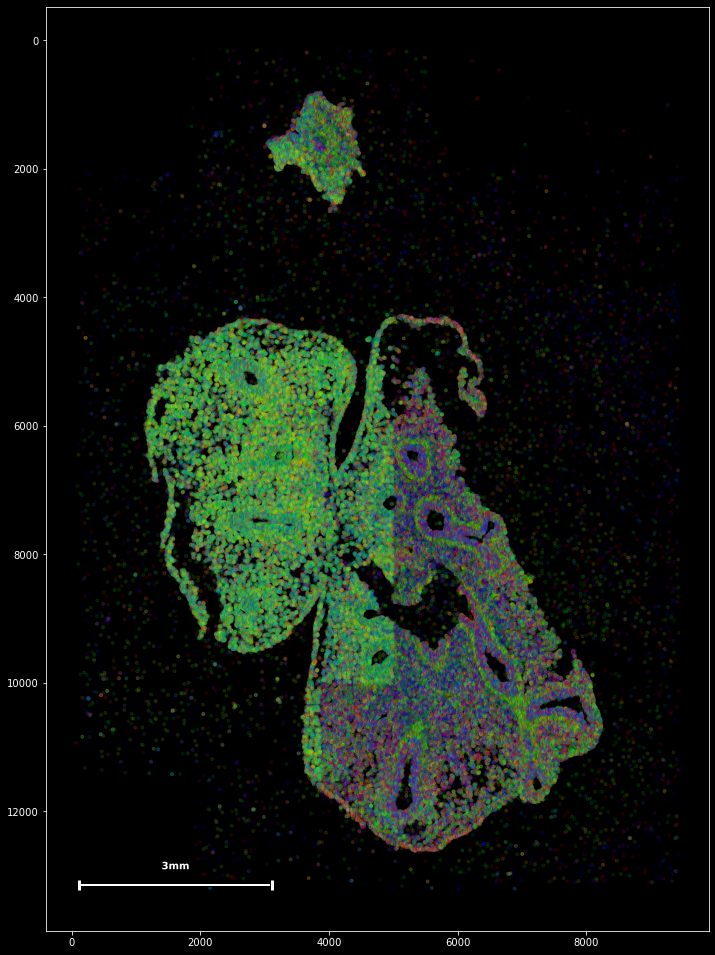

In [9]:
plt.figure(figsize=(17,17))
sdata.scatter(alpha=0.1,marker='.')

In [52]:
# Parameterization for data cleaning/artefact removal:`

import time

knn_neighbors=250
bandwidth=40
n_neighbors=100
metric='euclidean'
min_dist=0.01
random_state=42
zero_weight=0.0
cutoff=10

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)


t = time.perf_counter()
sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight,cutoff=cutoff)
print(time.perf_counter()-t)


933.0207080370164


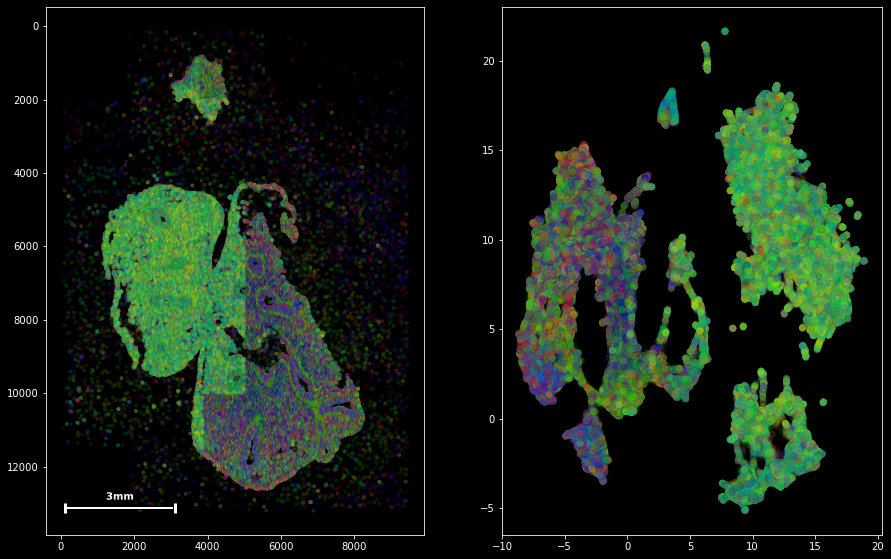

In [53]:
sdata.graph.map_and_umap(alpha=0.1)

In [56]:
sdata.graph.umap_js()

    'data': [{'hoverinfo': 'none',
              'marker': {'colo…

In [117]:
sdata_clean = sdata[~sdata.noise]

In [71]:
sdata_artefact=sdata_clean[sdata_clean.artefact]

In [78]:
from scipy.stats import binom

In [81]:
p=binom.cdf(sdata_artefact.counts,sdata_clean.counts,sdata_clean.artefact.mean())

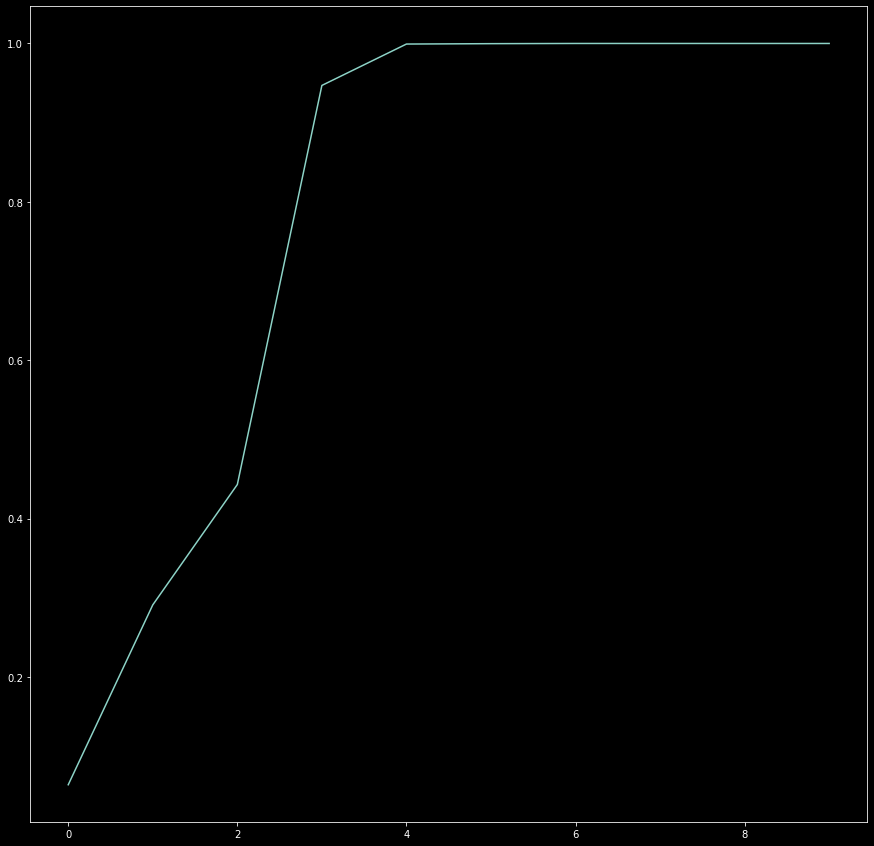

In [113]:
# genes_artefact = sdata_clean.genes[np.argsort(p)[86:]]

plt.plot(sorted(p)[80:90])


In [120]:
sdata = sdata_clean[~sdata_clean.g.isin(genes_artefact)]

(<matplotlib.collections.PathCollection at 0x7f872cb485e0>, None, None)

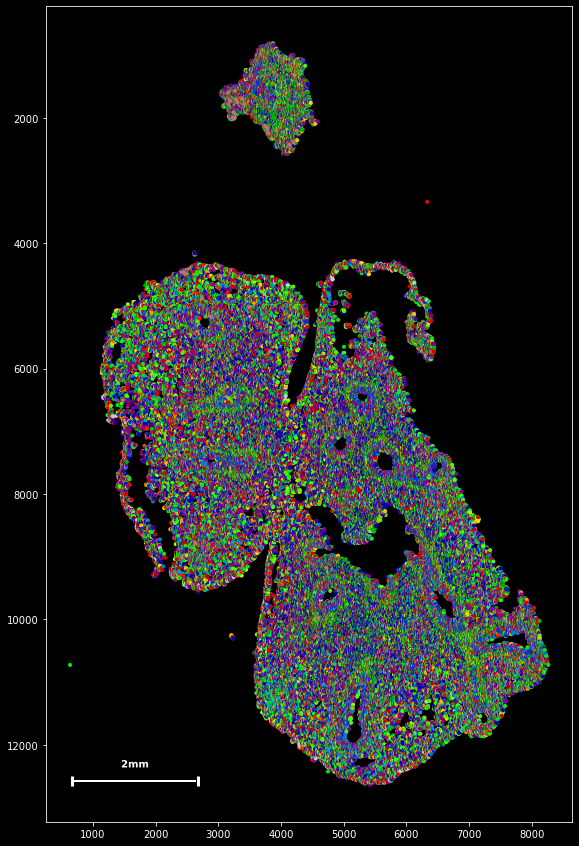

In [121]:
sdata.scatter()

In [124]:
# Parameterization for data cleaning/artefact removal:`

import time

knn_neighbors=250
bandwidth=30
n_neighbors=100
metric='euclidean'
min_dist=0.01
random_state=42
zero_weight=0.0
cutoff=20

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)


t = time.perf_counter()
sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight,cutoff=cutoff)
print(time.perf_counter()-t)


841.2847053160076


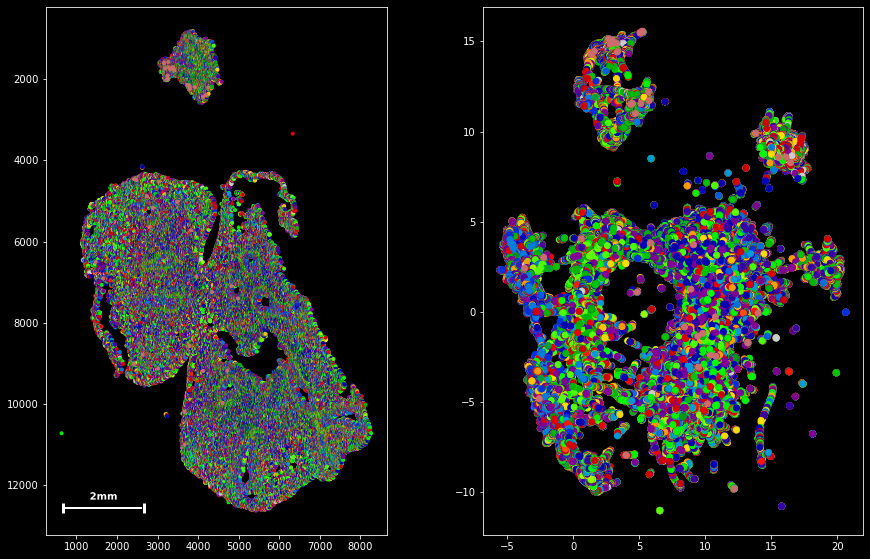

In [125]:
sdata.graph.map_and_umap()

In [126]:
sdata.graph.umap_js()

    'data': [{'hoverinfo': 'none',
              'marker': {'colo…

(<matplotlib.collections.PathCollection at 0x7f8732f7dac0>, None, None)

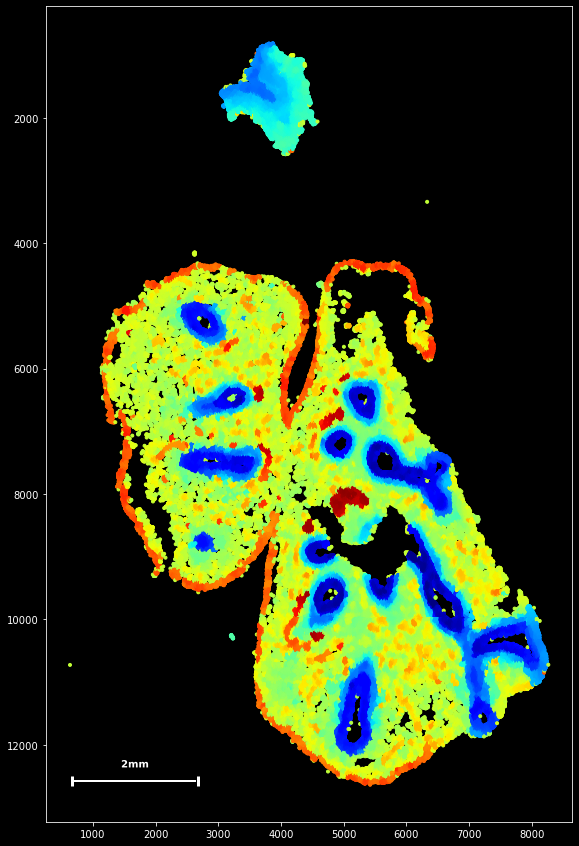

In [129]:
sdata.scatter(c=sdata.graph.umap[:,0])